## Algoritmos Genéticos: Problema de la Mochila

Siguiendo los pasos de la teoria de Algoritmos Genéticos, has el algoritmo del problema de la mochila.

- Población Inicial: 50
- Número de Genes: 20
- Probabilidad de Cruce: 0.9
- Probabilidad de Mutación: 0.1
- Número de generaciones: 5000

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import random

In [4]:
peso_max = 50

n_poblacion = 50
n_genes = 20
p_cruce = 0.9
p_mutacion = 0.1

In [2]:
valores = [116, 159, 132, 194, 148, 161, 154, 157, 136, 102, 159, 191, 126, 182, 182, 106, 181, 136, 134, 180]
pesos = [3, 3, 3, 10, 4, 6, 4, 3, 2, 1, 9, 1, 9, 9, 8, 9, 6, 4, 4, 4]

objetos = [f"objeto_{i}" for i in range(20)]

# print("Valores:", valores)
# print("Pesos:", pesos)
# print(f"Objetos:", objetos)

for v, p, o in zip(valores, pesos, objetos):
    print(v, p, o)

116 3 objeto_0
159 3 objeto_1
132 3 objeto_2
194 10 objeto_3
148 4 objeto_4
161 6 objeto_5
154 4 objeto_6
157 3 objeto_7
136 2 objeto_8
102 1 objeto_9
159 9 objeto_10
191 1 objeto_11
126 9 objeto_12
182 9 objeto_13
182 8 objeto_14
106 9 objeto_15
181 6 objeto_16
136 4 objeto_17
134 4 objeto_18
180 4 objeto_19


#### ¿Cual es la mejor combinación para tener el mejor valor con un peso que no supere los 50kg?

In [15]:
individuo = [random.randint(0, 1) for i in range(n_genes)]

print(individuo)

[1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1]


In [16]:
# Calcular peso
np.dot(individuo, pesos)

39

In [17]:
# Calcular valor
np.dot(individuo, valores)

982

In [18]:
# Calcular objetos
[x for x, i in zip(objetos, individuo) if i == 1]

['objeto_0',
 'objeto_1',
 'objeto_8',
 'objeto_10',
 'objeto_12',
 'objeto_15',
 'objeto_19']

In [19]:
individuo

[1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1]

- Estacional - Crowding Deterministico - 1 Solo hijo

### Definir Población

In [25]:
def definir_poblacion():

    poblacion = list()

    while len(poblacion) < 50:

        individuo = [random.randint(0, 1) for i in range(n_genes)]
        
        peso_individuo = np.dot(individuo, pesos)

        if peso_individuo <= peso_max:

            poblacion.append(individuo)

    return poblacion

In [26]:
poblacion = definir_poblacion()

poblacion

[[0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1],
 [0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1],
 [0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0],
 [1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
 [1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0],
 [1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0],
 [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0],
 [0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
 [0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1],
 [1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1],
 [1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1],
 [1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0],
 [0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0],
 [1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,

In [27]:
for ind in poblacion:
    print(f"Peso: {np.dot(ind, pesos)}")
    print(f"Valor: {np.dot(ind, valores)}")
    print("*"*100)

Peso: 38
Valor: 1094
****************************************************************************************************
Peso: 37
Valor: 1200
****************************************************************************************************
Peso: 48
Valor: 1228
****************************************************************************************************
Peso: 37
Valor: 1306
****************************************************************************************************
Peso: 37
Valor: 1416
****************************************************************************************************
Peso: 43
Valor: 1179
****************************************************************************************************
Peso: 31
Valor: 1143
****************************************************************************************************
Peso: 41
Valor: 1098
****************************************************************************************************
Peso: 41
Valor: 1530
***

### Selección por Torneo

In [35]:
k = 5

torneo = random.sample(population = poblacion, k = k)

torneo

[[1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
 [1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0],
 [1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0],
 [1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]]

In [36]:
indice = np.argmax([np.dot(ind, valores) for ind in torneo])

indice

2

In [37]:
torneo[indice]

[1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0]

In [38]:
def seleccion_torneo(poblacion, k = 5):
    
    torneo = random.sample(population = poblacion, k = k)
    
    indice = np.argmax([np.dot(ind, valores) for ind in torneo])
    
    return torneo[indice]

In [39]:
padre1 = seleccion_torneo(poblacion = poblacion)
padre2 = seleccion_torneo(poblacion = poblacion)

print(padre1)
print(padre2)

[0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]
[1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1]


### Selección Muestreo Universal

In [43]:
valores_poblacion = [np.dot(ind, valores) for ind in poblacion]
poblacion = sorted(poblacion, key = lambda x : valores_poblacion)

In [58]:
df_poblacion = pd.DataFrame(data = poblacion)

df_poblacion["valores"] = [np.dot(ind, valores) for ind in poblacion]

poblacion = [list(x) for x in df_poblacion.sort_values("valores", ascending = False).iloc[:, :-1].values]

poblacion

[[1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0],
 [1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1],
 [0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1],
 [1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1],
 [1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1],
 [0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
 [0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1],
 [1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1],
 [0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0],
 [1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1],
 [1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1],
 [1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1],
 [0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1],
 [0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0],
 [1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,

In [69]:
quesito = np.array([np.dot(ind, valores)/sum([np.dot(ind, valores) for ind in poblacion]) for ind in poblacion]).cumsum()

quesito

array([0.02902758, 0.05574252, 0.0815005 , 0.10684381, 0.13170864,
       0.15611094, 0.18016236, 0.20421378, 0.22813761, 0.25143942,
       0.27437439, 0.29700633, 0.31959042, 0.34206287, 0.36440773,
       0.38616246, 0.4077896 , 0.42936889, 0.45086843, 0.47209684,
       0.49292652, 0.5137243 , 0.53433069, 0.55474569, 0.57468221,
       0.59455494, 0.61425222, 0.63383786, 0.65297692, 0.67178105,
       0.69009075, 0.7083845 , 0.72661446, 0.74471682, 0.76275539,
       0.78050687, 0.79801911, 0.81546755, 0.83283625, 0.84994976,
       0.86690378, 0.88363451, 0.89975917, 0.91572433, 0.93138647,
       0.94620329, 0.96086062, 0.97460885, 0.98811783, 1.        ])

In [68]:
n_aleatorio = random.random()

n_aleatorio

0.2692767127749468

In [73]:
for i in range(len(quesito) - 1):
    
    if quesito[i] < n_aleatorio < quesito[i + 1]:
        
        print(i)

9


In [74]:
poblacion[9]

[1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0]

In [75]:
n_aleatorio2 = n_aleatorio + 0.5
n_aleatorio2

0.7692767127749468

In [78]:
for i in range(len(quesito) - 1):
    
    if quesito[i] < n_aleatorio2 < quesito[i + 1]:
        
        print(i)

34


In [79]:
poblacion[34]

[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0]

In [89]:
n_aleatorio = random.random()

for i in range(len(quesito) - 1):
    
    if quesito[i] < n_aleatorio < quesito[i + 1]:
        
        intervalo1 = i
        
if i < 25:
    intervalo2 = i + 25
    
else:
    intervalo2 = i - 25
    
padre1 = poblacion[intervalo1]
padre2 = poblacion[intervalo2]

print(padre1)
print(padre2)

[0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1]
[0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1]


In [127]:
def seleccion_muestreo_universal(poblacion):
    
    poblacion = poblacion.copy()
    
    df_poblacion = pd.DataFrame(data = poblacion)

    df_poblacion["valores"] = [np.dot(ind, valores) for ind in poblacion]

    poblacion = [list(x) for x in df_poblacion.sort_values("valores", ascending = False).iloc[:, :-1].values]
    
    quesito = np.array([0] + [np.dot(ind, valores)/sum([np.dot(ind, valores) for ind in poblacion]) for ind in poblacion]).cumsum()

    n_aleatorio = random.random()

    for i in range(len(quesito) - 1):

        if quesito[i] < n_aleatorio < quesito[i + 1]:

            intervalo1 = i

    if i < 25:
        intervalo2 = i + 25

    else:
        intervalo2 = i - 25

    padre1 = poblacion[intervalo1]
    padre2 = poblacion[intervalo2]

    return padre1, padre2

In [92]:
padre1, padre2 = seleccion_muestreo_universal(poblacion)

print(padre1)
print(padre2)

[1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1]


### Cruzamiento Binario Uniforme

In [93]:
hijo1, hijo2 = list(), list()

for p1, p2 in zip(padre1, padre2):
    
    n_aleatorio = random.random()
    
    if n_aleatorio < 0.5:
        
        hijo1.append(p1)
        hijo2.append(p2)
        
    else:
        hijo1.append(p2)
        hijo2.append(p1)
        
print(hijo1)
print(hijo2)

[1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1]
[0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0]


In [105]:
def cruzamiento_binario_uniforme(padre1, padre2):
    
    hijo1= list()

    for p1, p2 in zip(padre1, padre2):

        n_aleatorio = random.random()

        if n_aleatorio < 0.5:

            hijo1.append(p1)

        else:
            hijo1.append(p2)

    return hijo1

In [106]:
hijo1 = cruzamiento_binario_uniforme(padre1, padre2)

print(hijo1)

[0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0]


### Mutacion Binaria

In [96]:
k = random.randint(0, n_genes - 1)

if hijo1[k] == 0:
    hijo1[k] = 1
    
else:
    hijo1[k] = 0

9

In [107]:
def mutacion_binaria(hijo, p_mutacion = p_mutacion):
    
    hijo = hijo.copy()
    
    n_aleatorio = random.random()
    
    if n_aleatorio < p_mutacion:

        k = random.randint(0, n_genes - 1)

        if hijo[k] == 0:
            hijo[k] = 1

        else:
            hijo[k] = 0
            
        return hijo
            
    else:
        
        return hijo

In [108]:
hijo1 = mutacion_binaria(hijo1)

print(hijo1)

[0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0]


### Comprobación Hijo

In [109]:
np.dot(hijo1, pesos)

44

### Reemplazo Crowding Deterministico

In [113]:
print(padre1)
print(padre2)
print(hijo1)

[1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1]
[0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0]


In [112]:
total1, total2 = 0, 0

for h1, p1, p2 in zip(hijo1, padre1, padre2):
    
    if h1 == p1:
        total1 += 1
    if h1 == p2:
        total2 += 1
        
print(total1, total2)
        
if total1 > total2:
    
    print("Padre1")
    
else:
    
    print("Padre2")
    

16 18
Padre2


In [118]:
def reemplazo_crowding_deterministico(padre1, padre2, hijo1):
    
    total1, total2 = 0, 0

    for h1, p1, p2 in zip(hijo1, padre1, padre2):

        if h1 == p1:
            total1 += 1
        if h1 == p2:
            total2 += 1

    if total1 > total2:

        return padre2, hijo1

    else:

        return padre1, hijo1

In [119]:
padre, hijo = reemplazo_crowding_deterministico(padre1, padre2, hijo1)

print(padre)
print(hijo)

[1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0]


In [120]:
poblacion.remove(padre1)
poblacion.remove(padre2)

poblacion.append(padre)
poblacion.append(hijo)

### Bucle Tocho

In [137]:
%%time

generaciones = 5_000

lista_mejor_individuo, lista_mejor_valor = list(), list()

poblacion = definir_poblacion()

for i in range(generaciones):
    
    padre1, padre2 = seleccion_muestreo_universal(poblacion = poblacion)
    
    hijo1 = cruzamiento_binario_uniforme(padre1 = padre1, padre2 = padre2)
    
    hijo1 = mutacion_binaria(hijo1)
    
    peso_hijo1 = np.dot(hijo1, pesos)/
    
    if peso_hijo1 <= peso_max:
        
        padre, hijo = reemplazo_crowding_deterministico(padre1, padre2, hijo1)
        
        if padre == padre1:
        
            poblacion.remove(padre2)
        
        else:
            
            poblacion.remove(padre1)

        poblacion.append(hijo)
    
    
    mejores_valores = [np.dot(ind, valores) for ind in poblacion]
    
    mejor_indice = np.argmax(mejores_valores)
    
    mejor_individuo = poblacion[mejor_indice].copy()
    
    lista_mejor_individuo.append(mejor_individuo)
    
    lista_mejor_valor.append(np.dot(mejor_individuo, valores))

CPU times: total: 42.3 s
Wall time: 2min 8s


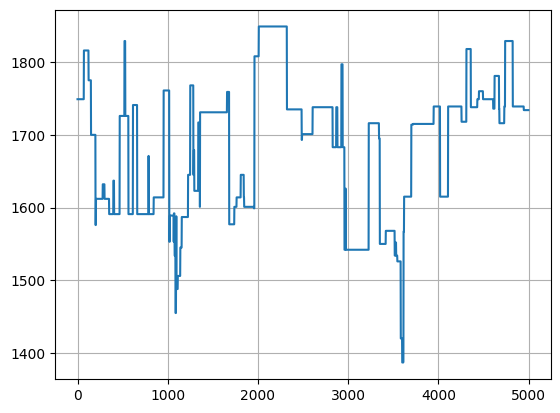

In [139]:
plt.plot(lista_mejor_valor)
plt.grid()
plt.show()

In [141]:
mejor_indice = np.argmax(lista_mejor_valor)

In [142]:
lista_mejor_valor[mejor_indice]

1849

In [143]:
lista_mejor_individuo[mejor_indice]

[1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1]

In [144]:
np.dot(lista_mejor_individuo[mejor_indice], pesos)

49

In [145]:
[x for x, i in zip(objetos, lista_mejor_individuo[mejor_indice]) if i == 1]

['objeto_0',
 'objeto_1',
 'objeto_2',
 'objeto_3',
 'objeto_4',
 'objeto_6',
 'objeto_7',
 'objeto_9',
 'objeto_11',
 'objeto_13',
 'objeto_18',
 'objeto_19']

In [ ]:
################################################################################################################################